In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
import pandas as pd
df_products = pd.read_csv('/content/drive/My Drive/BA820-Project/productinfo.csv')
df_reviews_1 = pd.read_csv("/content/drive/MyDrive/BA820-Project/reviews0-250.csv")
df_reviews_2 = pd.read_csv("/content/drive/MyDrive/BA820-Project/reviews250-500.csv")
df_reviews_3 = pd.read_csv("/content/drive/MyDrive/BA820-Project/reviews500-750.csv")
df_reviews_4 = pd.read_csv("/content/drive/MyDrive/BA820-Project/reviews750-1250.csv")
df_reviews_5 = pd.read_csv("/content/drive/MyDrive/BA820-Project/reviews1250-end.csv")

<ipython-input-3-10c390fb889f>:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reviews_1 = pd.read_csv("/content/drive/MyDrive/BA820-Project/reviews0-250.csv")
<ipython-input-3-10c390fb889f>:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reviews_4 = pd.read_csv("/content/drive/MyDrive/BA820-Project/reviews750-1250.csv")
<ipython-input-3-10c390fb889f>:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reviews_5 = pd.read_csv("/content/drive/MyDrive/BA820-Project/reviews1250-end.csv")


In [ ]:
df_products.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


# 1. Data Exploration

In [ ]:
df_products['highlights'].unique()

array(["['Unisex/ Genderless Scent', 'Warm &Spicy Scent', 'Woody & Earthy Scent', 'Fresh Scent']",
       "['Unisex/ Genderless Scent', 'Layerable Scent', 'Warm &Spicy Scent']",
       "['Unisex/ Genderless Scent', 'Layerable Scent', 'Woody & Earthy Scent']",
       ...,
       "['Best for Oily, Combo, Normal Skin', 'Without Parabens', 'Without Mineral Oil', 'Matte Finish', 'Salicylic Acid']",
       "['Natural Finish', 'Without Mineral Oil', 'Without Parabens']",
       "['Hyaluronic Acid', 'High Shine Finish', 'Plumping', 'Hydrating', 'Medium Coverage']"],
      dtype=object)

In [ ]:
df_products['variation_type'].unique()

array([nan, 'Size + Concentration + Formulation', 'Scent', 'Size',
       'Color', 'Size + Concentration', 'Type', 'Formulation'],
      dtype=object)

In [ ]:
df_products['variation_value'].unique()

array([nan, '3.4 oz/ 100 mL', '0.25 oz/ 7.5 mL Eau de Parfum Spray', ...,
       '0.25 oz/ 7.5 ml', '2.6 oz', '2 oz / 60 mL eau de parfum spray'],
      dtype=object)

In [ ]:
df_products['size'].unique()

array([nan, '3.4 oz/ 100 mL', '0.25 oz/ 7.5 mL', ..., '0.25 oz/ 7.5 ml',
       '2.6 oz', '.11 oz / 3.2 mL'], dtype=object)

In [ ]:
df_reviews = pd.concat([df_reviews_1, df_reviews_2, df_reviews_3, df_reviews_4, df_reviews_5])
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094411 entries, 0 to 49976
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Unnamed: 0                1094411 non-null  int64  
 1   author_id                 1094411 non-null  object 
 2   rating                    1094411 non-null  int64  
 3   is_recommended            926423 non-null   float64
 4   helpfulness               532819 non-null   float64
 5   total_feedback_count      1094411 non-null  int64  
 6   total_neg_feedback_count  1094411 non-null  int64  
 7   total_pos_feedback_count  1094411 non-null  int64  
 8   submission_time           1094411 non-null  object 
 9   review_text               1092967 non-null  object 
 10  review_title              783757 non-null   object 
 11  skin_tone                 923872 non-null   object 
 12  eye_color                 884783 non-null   object 
 13  skin_type                 982

## 1.1 null values exploration

**PRODUCT TABLE**:
1. drop `sale_price_usd`, `value_price_usd`, `variation_desc`,`child_max_price`, `child_min_price`, `size`, `variation_type`, `variation_value`
2. impute values into `highlights` and `ingredients` with "NA"
3. keep `tertiary_category` for dimensionality reduction? impute with unknown for this + the `secondary_category` nulls too
4. for reviews nulls, check if any reviews exist in the reviews table & count them. Impute with that value, else 0
5. for ratings nulls, impute with the mean or median depending on skewness OR do average of ratings in review table

In [ ]:
import numpy as np
np.round((df_products.isna().sum())/len(df_products),2).sort_values(ascending=False)

sale_price_usd        0.97
value_price_usd       0.95
variation_desc        0.85
child_max_price       0.68
child_min_price       0.68
highlights            0.26
size                  0.19
variation_value       0.19
variation_type        0.17
tertiary_category     0.12
ingredients           0.11
rating                0.03
reviews               0.03
sephora_exclusive     0.00
brand_id              0.00
child_count           0.00
secondary_category    0.00
primary_category      0.00
new                   0.00
out_of_stock          0.00
online_only           0.00
limited_edition       0.00
brand_name            0.00
product_name          0.00
price_usd             0.00
loves_count           0.00
product_id            0.00
dtype: float64

In [ ]:
null_rows = df_products[df_products['size'].isnull() & df_products['variation_value'].isnull()] #due to similarities between size and variation_value columns, we considered to fill in with overlaps

print(len(null_rows)) #however, teh result shows that most of the rows have missing values in both columns

1333


**REVIEW TABLE**:
1. Drop `helpfulness` due to a significant number of missing values
2.  Drop the `is_recommended` column By analyzing the ratings, we can infer whether a product is likely to be recommended without the explicit need for the is_recommended data point.
2. Replace null review_text and review_title with "NA"
3. Replace skin_tone, eye_color, skin_type, hair_color with "Unknown"

In [ ]:
(df_reviews.isna().sum()/len(df_reviews)).sort_values(ascending= False)

helpfulness                 0.513145
review_title                0.283855
hair_color                  0.207206
eye_color                   0.191544
skin_tone                   0.155827
is_recommended              0.153496
skin_type                   0.101933
review_text                 0.001319
brand_name                  0.000000
product_name                0.000000
product_id                  0.000000
Unnamed: 0                  0.000000
author_id                   0.000000
submission_time             0.000000
total_pos_feedback_count    0.000000
total_neg_feedback_count    0.000000
total_feedback_count        0.000000
rating                      0.000000
price_usd                   0.000000
dtype: float64

### 1.1.1 dropping columns with large missing values

In [ ]:
df_products = df_products.drop(columns=['value_price_usd', 'sale_price_usd', 'child_max_price', 'child_min_price', 'variation_desc', 'variation_type', 'variation_value', 'size'])

In [ ]:
df_reviews = df_reviews.drop(columns=['helpfulness', 'is_recommended', 'Unnamed: 0'])

In [ ]:
df_products.shape, df_reviews.shape

((8494, 19), (1094411, 16))

### 1.1.2 null value imputation

**PRODUCT TABLE**

In [ ]:
df_products.isna().sum()

product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                 278
reviews                278
ingredients            945
price_usd                0
limited_edition          0
new                      0
online_only              0
out_of_stock             0
sephora_exclusive        0
highlights            2207
primary_category         0
secondary_category       8
tertiary_category      990
child_count              0
dtype: int64

Impute missing values in 'highlights' and 'ingredients' columns with 'Unknown'

In [ ]:
df_products['highlights'] = df_products['highlights'].fillna('Unknown')
df_products['ingredients'] = df_products['ingredients'].fillna('Unknown')

Impute missing values in 'tertiary_category' and 'secondary_category' columns with 'Unknown'

In [ ]:
df_products['tertiary_category'] = df_products['tertiary_category'].fillna('Unknown')
df_products['secondary_category'] = df_products['secondary_category'].fillna('Unknown')

**REVIEW TABLE**

Replace null values in 'review_text' and 'review_title' with Unknown'

In [ ]:
df_reviews['review_text'] = df_reviews['review_text'].fillna('Unknown')
df_reviews['review_title'] = df_reviews['review_title'].fillna('Unknown')

Replace null values in 'skin_tone', 'eye_color', 'skin_type', and 'hair_color' with 'Unknown'

In [ ]:
df_reviews['skin_tone'] = df_reviews['skin_tone'].fillna('Unknown')
df_reviews['eye_color'] = df_reviews['eye_color'].fillna('Unknown')
df_reviews['skin_type'] = df_reviews['skin_type'].fillna('Unknown')
df_reviews['hair_color'] = df_reviews['hair_color'].fillna('Unknown')

Count the number of rows with null 'reviews' in df_products

In [ ]:
df_products[df_products['reviews'].isna()].shape[0]

278

Update the `reviews` column in df_products with the actual count of reviews if available, or impute it with 0 if no reviews are found. Iterated over rows in the df_products where the reviews column is null, identifying each product by its ID, and counting corresponding reviews in the df_reviews.

In [ ]:
null_reviews = df_products[df_products['reviews'].isna()]
null_reviews.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count
42,P471525,Arancia di Capri Candle,5847,Acqua di Parma,601,NaN,NaN,Unknown,82.0,0,0,1,0,0,Unknown,Fragrance,Candles & Home Scents,Candles,0
60,P473154,Mini Baomint Moisturizing Curl Defining Gel,6321,adwoa beauty,0,NaN,NaN,"['Water (Aqua), Glycerin, Prunus Amygdalus Dul...",14.0,0,0,0,0,1,"['allure 2020 Best of Beauty Award Winner', 'C...",Hair,Mini Size,Unknown,0
61,P473153,Mini Baomint Moisturizing Curl Defining Cream,6321,adwoa beauty,0,NaN,NaN,"['Water (Aqua), Behentrimonium Methosulfate, C...",14.0,0,0,1,0,1,"['Clean at Sephora', 'Good for: Volume', 'All ...",Hair,Mini Size,Unknown,0
62,P473152,Mini Baomint Leave-In Conditioning Styler,6321,adwoa beauty,0,NaN,NaN,"['Water (Aqua), Behentrimonium Methosulfate, C...",13.0,0,0,1,0,1,"['Clean at Sephora', 'All Hair Types', 'Curl-E...",Hair,Mini Size,Unknown,0
63,P473155,Mini Baomint Moisturizing Shampoo,6321,adwoa beauty,0,NaN,NaN,"['Water (Aqua), Aloe Barbadensis Leaf Juice, C...",12.0,0,0,1,0,1,"['Unisex/ Genderless Scent', 'Clean at Sephora...",Hair,Mini Size,Unknown,0


In [ ]:
for idx, product_row in null_reviews.iterrows():
    product_id = product_row['product_id']
    # Count the number of reviews for those products in df_reviews
    review_count = df_reviews[df_reviews['product_id'] == product_id].shape[0]
    # Update df_products with the count or 0 if no reviews exist
    df_products.at[idx, 'reviews'] = review_count if review_count > 0 else 0

## 1.2 Pre-processing

### 1.2.1 Rating


Measure the asymmetry of the distribution of ratings around the mean value

In [ ]:
skewness = df_products['rating'].skew()
skewness

-1.51762879552522

 Visualize the skewness of the rating distribution using a histogram

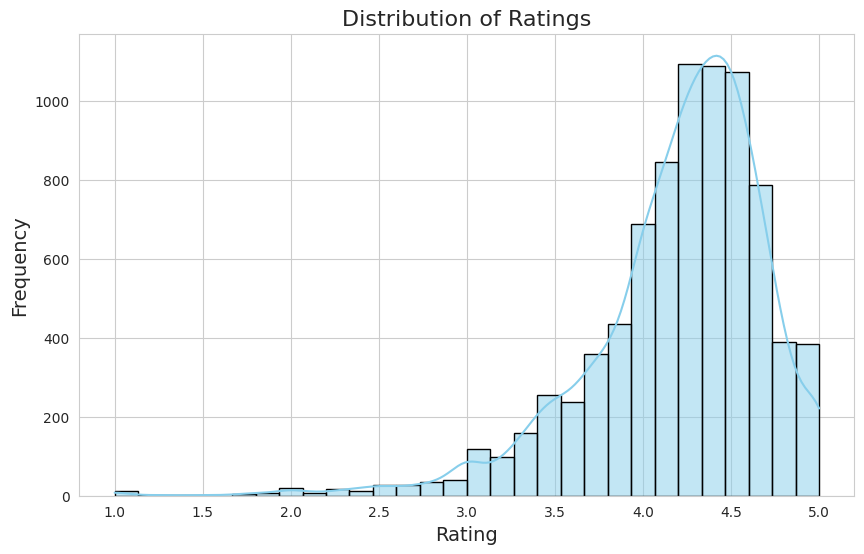

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df_products['rating'], kde=True, bins=30, color='skyblue', edgecolor='black')

# title and label
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

Impute missing values in 'rating' with the median since the histogram indicates a left-skewed distribution, meaning that it is more appropriate to impute missing values with the median rather than the mean. The median is less affected by outliers and skewed data, making it a better choice for imputation in this case.

In [ ]:
df_products['rating'] = df_products['rating'].fillna(df_products['rating'].median())

In [ ]:
df_products['reviews'].isna().sum()

0

### 1.2.2 Price

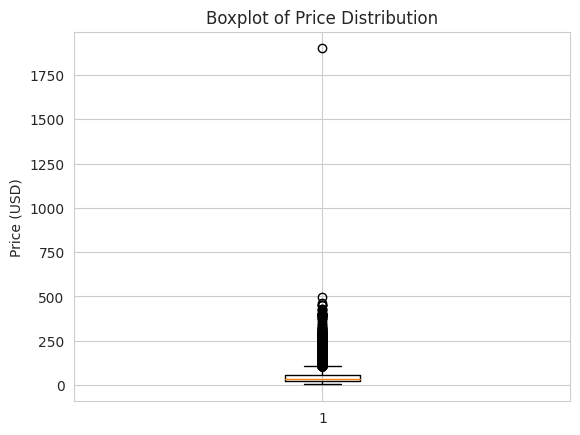

In [ ]:
import matplotlib.pyplot as plt

# Create a boxplot
plt.boxplot(df_products['price_usd'].dropna())

# Set the title and labels
plt.title('Boxplot of Price Distribution')
plt.ylabel('Price (USD)')

# Show the plot
plt.show()


In [ ]:
df_products['price_usd'].max()

1900.0

We can drop this because it is clearly an outlier.

In [ ]:
df_products = df_products[df_products['price_usd'] < 1900]

### 1.2.3 Duplicates

In [ ]:
duplicates = df_products[df_products.duplicated(['product_name', 'brand_name'], keep=False)]
duplicates.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count
897,P280544,Brilliantine,5995,Bumble and bumble,8738,4.2990,301.0,"['Water, Glycerin, Caprylic/Capric Triglycerid...",26.0,0,0,0,0,0,Unknown,Hair,Hair Styling & Treatments,Hair Styling Products,0
946,P425469,Brilliantine,5995,Bumble and bumble,2140,4.5000,10.0,"['Water, Glycerin, Caprylic/Capric Triglycerid...",26.0,0,0,0,0,0,Unknown,Mini Size,Hair,Unknown,0
1327,P415749,Body Fit Anti-Cellulite Contouring & Firming E...,2082,Clarins,18756,4.0385,52.0,"['Water, Alcohol, Glycerin, Butylene Glycol,Di...",77.0,0,0,0,0,0,"['Good for: Loss of firmness', 'Hydrating', 'W...",Bath & Body,Body Care,Cellulite & Stretch Marks,1
1340,P456195,Body Fit Anti-Cellulite Contouring & Firming E...,2082,Clarins,6074,3.5455,11.0,"['Water, Caprylic/Capric Triglyceride, Alcohol...",66.0,0,0,0,0,0,Unknown,Bath & Body,Body Care,Cellulite & Stretch Marks,0
1407,P122882,Clarifying Lotion 2,1254,CLINIQUE,38875,4.3815,1376.0,"['Water\\Aqua\\Eau, Alcohol Denat., Glycerin, ...",20.0,0,0,0,0,0,Unknown,Skincare,Cleansers,Toners,2


We checked for duplicates and found products that had the same product name and brand name but we realized that because the product and its mini / travel sized version are considered separate products on Sephora, they are not actually duplicates, as they have different features and different prices. So we will keep them.

### 1.2.4 Data Types

We can convert reviews from float to int as they contain whole numbers.



In [ ]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8493 entries, 0 to 8493
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8493 non-null   object 
 1   product_name        8493 non-null   object 
 2   brand_id            8493 non-null   int64  
 3   brand_name          8493 non-null   object 
 4   loves_count         8493 non-null   int64  
 5   rating              8493 non-null   float64
 6   reviews             8493 non-null   float64
 7   ingredients         8493 non-null   object 
 8   price_usd           8493 non-null   float64
 9   limited_edition     8493 non-null   int64  
 10  new                 8493 non-null   int64  
 11  online_only         8493 non-null   int64  
 12  out_of_stock        8493 non-null   int64  
 13  sephora_exclusive   8493 non-null   int64  
 14  highlights          8493 non-null   object 
 15  primary_category    8493 non-null   object 
 16  second

In [ ]:
df_products['reviews'] = df_products['reviews'].astype('int64')

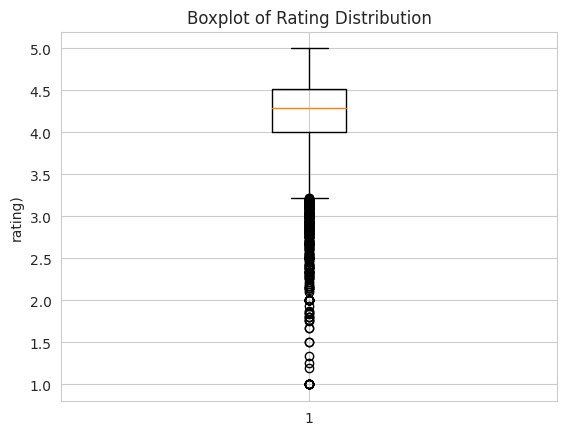

In [ ]:
import matplotlib.pyplot as plt

# Create a boxplot
plt.boxplot(df_products['rating'].dropna())

# Set the title and labels
plt.title('Boxplot of Rating Distribution')
plt.ylabel('rating)')

# Show the plot
plt.show()

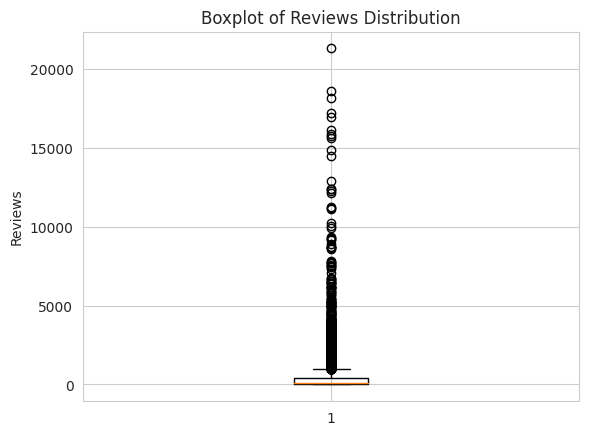

In [ ]:
# Create a boxplot
plt.boxplot(df_products['reviews'].dropna())

# Set the title and labels
plt.title('Boxplot of Reviews Distribution')
plt.ylabel('Reviews')

# Show the plot
plt.show()

In [ ]:
df_products[df_products['reviews'] > 20000] #investigation of the outlier

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count
4250,P245205,Tattoo Liner Vegan Waterproof Liquid Eyeliner,5905,KVD Beauty,566585,4.131,21281,"['Water, Ammonium Styrene/Acrylates Copolymer,...",25.0,0,0,0,0,0,"['Vegan', 'Community Favorite', ""allure 2018 R...",Makeup,Eye,Eyeliner,3


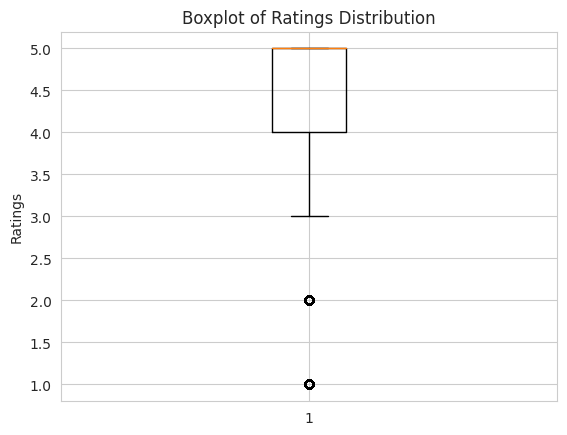

In [ ]:
# Create a boxplot
plt.boxplot(df_reviews['rating'].dropna())

# Set the title and labels
plt.title('Boxplot of Ratings Distribution')
plt.ylabel('Ratings')

# Show the plot
plt.show()

In [ ]:
df_reviews['rating'].value_counts()

5    698951
4    199389
3     81816
1     61223
2     53032
Name: rating, dtype: int64

In [ ]:
df_reviews['submission_time'] = pd.to_datetime(df_reviews['submission_time'])

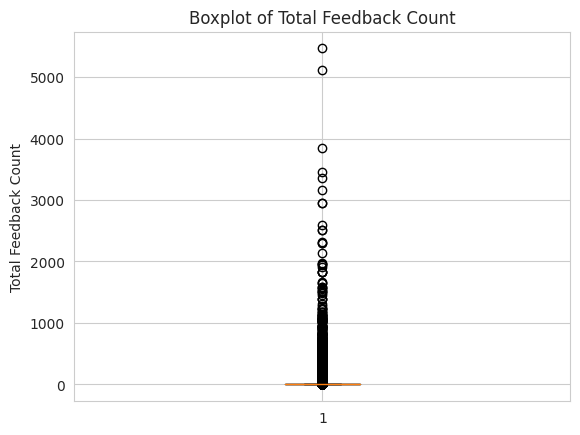

In [ ]:
# Create a boxplot
plt.boxplot(df_reviews['total_feedback_count'].dropna())

# Set the title and labels
plt.title('Boxplot of Total Feedback Count')
plt.ylabel('Total Feedback Count')

# Show the plot
plt.show()

In [ ]:
df_reviews['skin_tone'].value_counts()

light          266418
fair           208034
lightMedium    196541
Unknown        170539
medium          70486
mediumTan       62456
fairLight       56228
tan             33678
deep            20601
rich             5493
olive            1730
porcelain        1612
dark              522
notSureST          70
ebony               3
Name: skin_tone, dtype: int64

In [ ]:
df_reviews['author_id'].value_counts()

1696370280     234
1288462295     171
5060164185     132
2330399812     131
7375781965     130
              ... 
35785194231      1
34116589282      1
38362244649      1
37964060718      1
5595682861       1
Name: author_id, Length: 578653, dtype: int64

In [ ]:
df_reviews[df_reviews['author_id'] == '1696370280'].sort_values(by='submission_time').head(2)

,author_id,rating,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
73995,1696370280,5,2,0,2,2020-12-30,I love using this in conjunction with the blue...,amazing product,light,brown,combination,black,P400203,Lapis Blue Tansy Face Oil - For Oily & Acne-Pr...,Herbivore,74.0
519865,1696370280,5,2,1,1,2020-12-30,"I love this cleanser, and this entire line of ...",Love the tingle!,light,brown,combination,black,P416815,Find Your Balance Oil Control Cleanser,OLEHENRIKSEN,33.0


### 1.2.5 Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_products = ['loves_count', 'rating', 'reviews', 'price_usd', 'child_count']
numerical_reviews = ['rating', 'total_feedback_count', 'total_neg_feedback_count', 'total_pos_feedback_count', 'price_usd']

normalized_products = scaler.fit_transform(df_products[numerical_products])
df_products[numerical_products] = normalized_products

normalized_reviews = scaler.fit_transform(df_reviews[numerical_reviews])
df_reviews[numerical_reviews] = normalized_reviews

# 3. Unsupervised Methods

## 3.1 Market Basket Analysis

As the first method of unsupervised machine learning, we decided to use Market Basket Analysis to capture the products are typically purchased together.

This can be done by joining the `df_products` and `df_reviews` tables. From there, the products that have the same **review author** and **reviewed within a week** are grouped together as "one purchase"

### 3.1.1 Joining and grouping

In [ ]:
joined_table = df_reviews.merge(df_products, on=['product_id', 'product_name', 'brand_name'], how= 'inner', suffixes=('reviews', 'products'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
by_author = joined_table.groupby(['author_id', pd.Grouper(key='submission_time', freq='W')])['product_name'].agg(list)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 3.1.2 Tokenizing the grouped purchase

In [ ]:
products_MBA = list(by_author.apply(lambda x: str(x).split(',')))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for indx, lst in enumerate(products_MBA):
  lst = [i for i in lst if i]
  products_MBA[indx] = lst

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###3.1.2 One hot encoding

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
one_hot=TransactionEncoder()
df_encoded = pd.DataFrame(one_hot.fit(products_MBA).transform(products_MBA), columns=one_hot.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_encoded.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,"""Beauty Sleep Overnight Repair Treatment Cream with AHA's and Vitamin C""]","""Berries n' Choco Kisses Set""","""Berries n' Choco Kisses Set""]","""Cocoa Cleans'r Soothing All-Over Cleansing Bar""","""Cocoa Cleans'r Soothing All-Over Cleansing Bar""]","""Fenty Skin Travel Size Start'r Set""","""Fenty Skin Travel Size Start'r Set""]","""Let's Get Luminous Brightening Essentials Set""]","""Mini Charlotte's Magic Cream""","""Mini Charlotte's Magic Cream""]",...,['goopglow Cloudberry Exfoliating Jelly Cleanser'],['knockout brightening gel moisturizer'],['knockout daily exfoliating cleanser',['knockout daily exfoliating cleanser'],['needles no more 3-D LIP PLUMPFIX'],['needles no more Neck Sculpting Cream'],['pores no more Mattifying Hydrator Pore Minimizing Gel'],['pores no more Pore Purifying Cleanser'],['pores no more Vacuum Cleaner Pore Purifying Mask',['pores no more Vacuum Cleaner Pore Purifying Mask']
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### 3.1.3. Apriori and association rules

Due to the RAM of Colab notebooks, the `min_support` is set high to prevent notebook crash. If allowed, it's more ideal to lower the threshold to find more rules.

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(df_encoded, min_support=0.0035, use_colnames=True)
frequent_itemsets.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules= association_rules(frequent_itemsets, metric="support", min_threshold=0)
rules.sort_values(by= ['support', 'confidence'], ascending= False)

- There is a high correlation for products and their mini version.
- Customers tend to buy products in the same category together.